In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest   # o que essa lib faz?

In [2]:
# reding the csv data
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [4]:
# Numerical columns
num_col = trainData.select_dtypes(exclude=['object']).columns

# Categorial columns
cat_col = trainData.select_dtypes(include=['object']).columns

In [6]:
num_col

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [5]:
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [7]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [8]:
print("Train", trainData.shape)
print("Test", testData.shape)

Train (137, 43)
Test (100000, 42)


# PRE-PROCESSING AND SOME ANALYSIS

In [10]:
# get column with null values
trainData.columns[trainData.isna().any()].to_list()

[]

In [17]:
print('type', type(trainData['Open Date']))
print('dtype', trainData['Open Date'].dtype)

Type <class 'pandas.core.series.Series'>
Type object


In [38]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')
trainData['OpenDays'] = ""

# PORQUE USAR ESTÁ DATA
dateLastTrain = pd.DataFrame({ 'Date': np.repeat(['01/01/2018'], [len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')
dateLastTrain.head()

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)

0     6743 days
1     3609 days
2     1759 days
3     2160 days
4     3159 days
         ...   
132   3477 days
133   4099 days
134   4195 days
135   2621 days
136   3044 days
Length: 137, dtype: timedelta64[ns]

In [39]:
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159


# Comparing the revenue of big cities and other cities

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

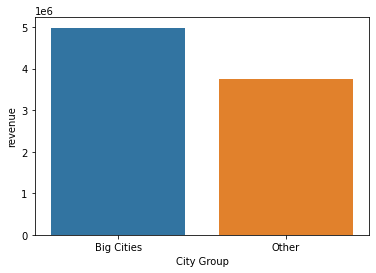

In [40]:
cityPerc = trainData[['City Group', 'revenue']].groupby(['City Group'], as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)

# Sorting the cities by revenue; getting the max earned cities

<AxesSubplot:xlabel='City', ylabel='revenue'>

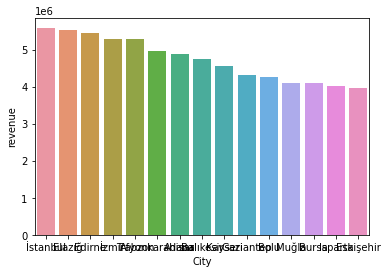

In [46]:
cityPerc = trainData[['City', 'revenue']].groupby(['City'], as_index=False).mean()
newDf = cityPerc.sort_values(['revenue'], ascending=False)
sns.barplot(x='City', y='revenue', data=newDf.head(15))

<AxesSubplot:xlabel='City', ylabel='revenue'>

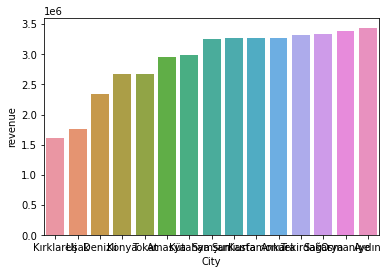

In [47]:
cityPerc = trainData[['City', 'revenue']].groupby(['City'], as_index=False).mean()
newDf = cityPerc.sort_values(['revenue'], ascending=True)
sns.barplot(x='City', y='revenue', data=newDf.head(15))

<AxesSubplot:xlabel='Type', ylabel='revenue'>

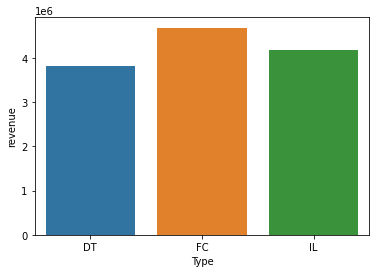

In [52]:
typePerc = trainData[['Type', 'revenue']].groupby(['Type'], as_index=False).mean()
sns.barplot(x='Type', y='revenue', data=typePerc)

# Plot about working days of specific restaurant types

<AxesSubplot:xlabel='Type', ylabel='OpenDays'>

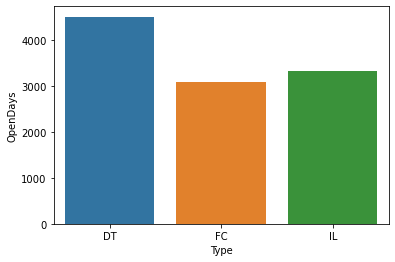

In [55]:
openDaysPerc = trainData[['Type', 'OpenDays']].groupby(['Type'], as_index=False).mean()
sns.barplot(x='Type', y='OpenDays', data=openDaysPerc)